Will add it to maps.ipynb later

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [5]:
la_map = gpd.read_file('../weather/data/la_england/LAD_MAY_2021_UK_BFE_V2.shp')
la_map = la_map[la_map['LAD21CD'].str.startswith('E')]

In [6]:
rainfall = pd.read_csv('../weather/data/rainfall.csv')
rainfall_map = la_map.merge(rainfall, left_on='LAD21CD', right_on='LA code')

In [7]:
rainfall_map.head()

,OBJECTID,LAD21CD,LAD21NM,BNG_E,BNG_N,LONG,LAT,SHAPE_Leng,SHAPE_Area,geometry,Unnamed: 0,LA code,"Average Rainfall (June, mm)"
0,1,E06000001,Hartlepool,447160,531474,-1.27018,54.676140,66110.011028,9.835107e+07,"POLYGON ((447213.900 537036.104, 447228.798 53...",74,E06000001,88.6
1,2,E06000002,Middlesbrough,451141,516887,-1.21099,54.544670,41055.789790,5.455359e+07,"POLYGON ((448489.897 522071.798, 448592.597 52...",75,E06000002,94.0
2,3,E06000003,Redcar and Cleveland,464361,519597,-1.00608,54.567520,105292.103526,2.537854e+08,"POLYGON ((455525.931 528406.654, 455724.632 52...",76,E06000003,89.0
3,4,E06000004,Stockton-on-Tees,444940,518183,-1.30664,54.556911,108085.190140,2.097308e+08,"POLYGON ((444157.002 527956.304, 444165.898 52...",77,E06000004,66.6
4,5,E06000005,Darlington,428029,515648,-1.56835,54.535339,107203.152334,1.974778e+08,"POLYGON ((423496.602 524724.299, 423497.204 52...",95,E06000005,71.2


In [19]:
england_file = '../weather/data/shape_england/RGN_DEC_2021_EN_BFC.shp'
england_map = gpd.read_file(england_file)

,OBJECTID,RGN21CD,RGN21NM,BNG_E,BNG_N,LONG,LAT,GlobalID,SHAPE_Leng,SHAPE_Area,geometry
0,1,E12000001,North East,417314,600356,-1.72888,55.297009,{200E0AB8-C057-4318-8FA7-83AFAAE4532F},1.035722e+06,8.598775e+09,"MULTIPOLYGON (((450254.000 525947.300, 450261...."
1,2,E12000002,North West,350014,506279,-2.77239,54.449440,{B9E22771-0329-4A9F-BD98-ACFBC19F19E1},2.386881e+06,1.416488e+10,"MULTIPOLYGON (((327866.924 373722.305, 327869...."
2,3,E12000003,Yorkshire and The Humber,446902,448736,-1.28714,53.932640,{9BAD8F71-D7EB-43E3-A935-A6A74F383A8C},1.392378e+06,1.540823e+10,"MULTIPOLYGON (((495603.099 422511.497, 495629...."
3,4,E12000004,East Midlands,477659,322635,-0.84969,52.795719,{4B1F8509-F426-473A-A5E2-F8B4516F748B},1.913277e+06,1.564332e+10,"MULTIPOLYGON (((552751.427 326659.292, 552759...."
4,5,E12000005,West Midlands,386294,295477,-2.20358,52.556969,{00DD263D-78D3-40FF-82FE-2E9F5FB0CB8D},9.537734e+05,1.300374e+10,"POLYGON ((402840.498 368845.598, 402862.397 36..."


<AxesSubplot:>

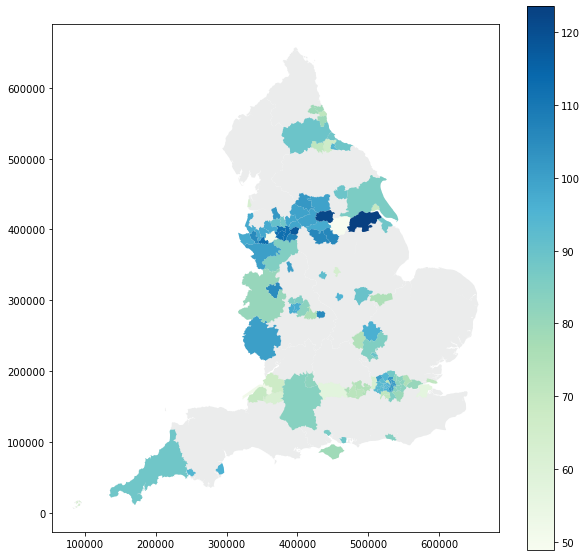

In [9]:
fig, ax = plt.subplots(figsize=(10,10))
england_map.plot(ax=ax,color='#EBECEC',linewidth=0.1);
rainfall_map.plot(ax=ax,column='Average Rainfall (June, mm)', edgecolor="black",linewidth=0,cmap='GnBu',legend=True)

<AxesSubplot:>

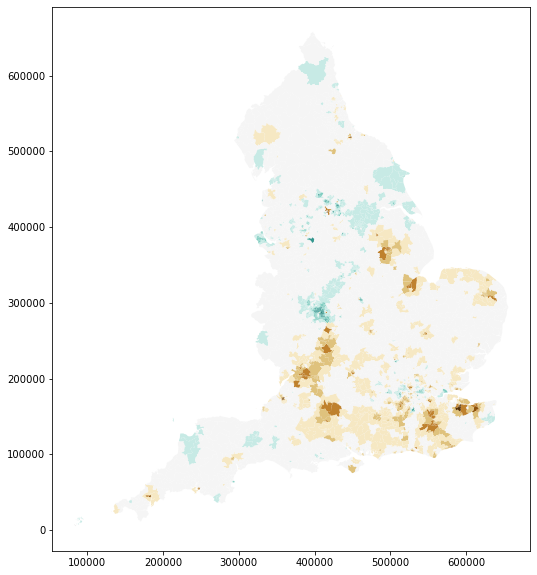

In [10]:
file = '../weather/data/loneliness/England/msoa_loneliness.shp'
msoa_map = gpd.read_file(file)
msoa_map['loneills_1'] = msoa_map['loneills_1'].replace(['nan'], '#ffffff')
msoa_map['loneills_2'] = msoa_map['loneills_2'].astype(float)
fig, ax = plt.subplots(figsize=(10,10))
msoa_map.plot(ax=ax,color=[c for c in msoa_map['loneills_1']], legend=True)

In [11]:
msoa_map.head()

,objectid,msoa11cd,msoa11nm,msoa11nmw,st_areasha,st_lengths,loneills_2,loneills_1,geometry
0,1,E02000001,City of London 001,City of London 001,2.983633e+06,8017.914674,0.610642,#f5f5f5,"POLYGON ((532419.592 181998.305, 532746.814 18..."
1,2,E02000002,Barking and Dagenham 001,Barking and Dagenham 001,2.091907e+06,7086.028359,-0.155306,#f5f5f5,"POLYGON ((548452.001 189024.718, 548235.426 18..."
2,3,E02000003,Barking and Dagenham 002,Barking and Dagenham 002,2.122216e+06,7405.118745,0.326728,#f5f5f5,"POLYGON ((548954.500 189063.203, 548874.188 18..."
3,4,E02000004,Barking and Dagenham 003,Barking and Dagenham 003,2.569470e+06,7148.814421,0.324374,#f5f5f5,"POLYGON ((551943.813 186027.672, 551670.812 18..."
4,5,E02000005,Barking and Dagenham 004,Barking and Dagenham 004,1.111109e+06,5491.227647,0.334801,#f5f5f5,"POLYGON ((549145.624 187383.875, 549128.657 18..."


In [12]:
lone_regions = msoa_map[['msoa11cd','msoa11nm','loneills_2','loneills_1']]
rainfall_regions = rainfall_map[['LAD21CD','LAD21NM']]
rainfall_regions.head()

,LAD21CD,LAD21NM
0,E06000001,Hartlepool
1,E06000002,Middlesbrough
2,E06000003,Redcar and Cleveland
3,E06000004,Stockton-on-Tees
4,E06000005,Darlington


In [13]:
for index, row in lone_regions.iterrows():
    lone_regions.at[index, 'msoa11nm'] = row['msoa11nm'][:-4]
lone_regions = lone_regions.groupby(['msoa11nm']).mean()
lone_regions.head()

,loneills_2
msoa11nm,
Adur,0.670868
Allerdale,0.162462
Amber Valley,-0.774770
Arun,0.672588
Ashfield,-0.708965


In [14]:
merged_regions = pd.merge(lone_regions,rainfall_regions, left_on='msoa11nm',right_on='LAD21NM')
merged_regions = merged_regions[['LAD21CD', 'loneills_2']]
merged_regions.head()

,LAD21CD,loneills_2
0,E09000002,0.244371
1,E09000003,1.224496
2,E08000016,0.129022
3,E06000022,0.780436
4,E06000055,-0.294203


In [15]:
maps = pd.merge(rainfall_map, merged_regions, on='LAD21CD')
maps.head()

,OBJECTID,LAD21CD,LAD21NM,BNG_E,BNG_N,LONG,LAT,SHAPE_Leng,SHAPE_Area,geometry,Unnamed: 0,LA code,"Average Rainfall (June, mm)",loneills_2
0,1,E06000001,Hartlepool,447160,531474,-1.27018,54.676140,66110.011028,9.835107e+07,"POLYGON ((447213.900 537036.104, 447228.798 53...",74,E06000001,88.6,-0.542761
1,2,E06000002,Middlesbrough,451141,516887,-1.21099,54.544670,41055.789790,5.455359e+07,"POLYGON ((448489.897 522071.798, 448592.597 52...",75,E06000002,94.0,1.316155
2,3,E06000003,Redcar and Cleveland,464361,519597,-1.00608,54.567520,105292.103526,2.537854e+08,"POLYGON ((455525.931 528406.654, 455724.632 52...",76,E06000003,89.0,0.649266
3,4,E06000004,Stockton-on-Tees,444940,518183,-1.30664,54.556911,108085.190140,2.097308e+08,"POLYGON ((444157.002 527956.304, 444165.898 52...",77,E06000004,66.6,0.635474
4,5,E06000005,Darlington,428029,515648,-1.56835,54.535339,107203.152334,1.974778e+08,"POLYGON ((423496.602 524724.299, 423497.204 52...",95,E06000005,71.2,0.967079


Text(0.5, 1.0, 'Rainfall')

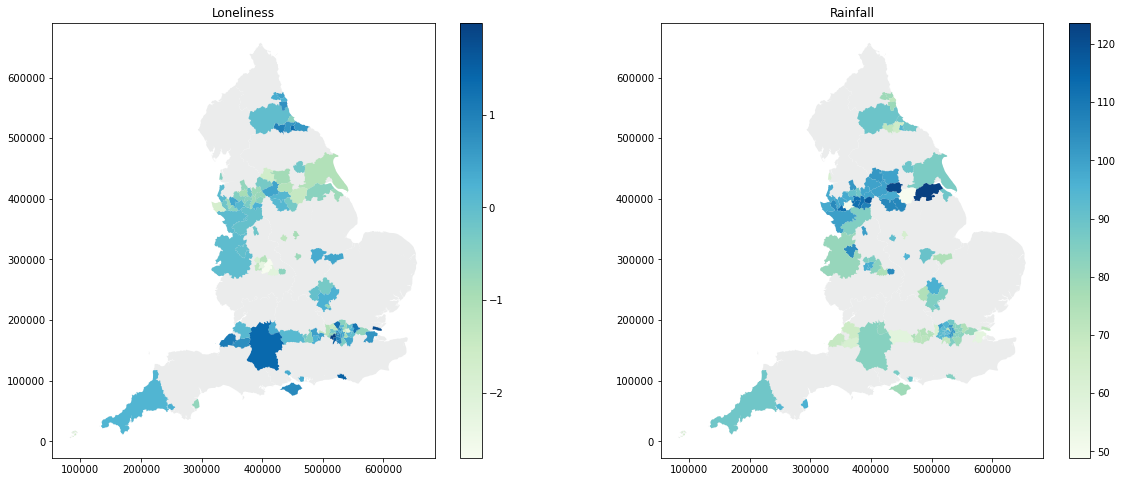

In [16]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
england_map.plot(ax=ax1,color='#EBECEC',linewidth=0.1)
england_map.plot(ax=ax2,color='#EBECEC',linewidth=0.1)
ax1 = maps.plot(ax=ax1,column='loneills_2', edgecolor="black",cmap='GnBu',linewidth=0,legend=True)
ax1.set_title('Loneliness')
ax2 = maps.plot(ax=ax2,column='Average Rainfall (June, mm)', edgecolor="black",linewidth=0,cmap='GnBu',legend=True)
ax2.set_title('Rainfall')

In [17]:
master_df = pd.read_csv('../master_df.csv')
master_df.head()

,Unnamed: 0.1,LA code,Ofsted Avg,lonely_avg,KS2 metrics PCA,GDHI income index,LA flow rate,All Ages,meds,old%,...,FSM Eligible %,<2 A levels,< AAB,perm_excl_rate,Unsuccessful Appeals,% of ppl not doing degrees,progression_rate,total_pop,Unnamed: 0,"Average Rainfall (June, mm)"
0,0,E06000001,3.000000,-0.542761,-22376.054139,NaN,0.006386,7819.666667,40.914654,0.192425,...,25.797120,29.545,89.831,7.240653,75.0,53.4,0.389333,5480.0,74.0,88.6
1,1,E06000002,2.955556,1.316155,-16308.990169,NaN,0.009087,7472.833333,38.022965,0.173324,...,24.189824,36.743,90.881,17.357524,78.3,46.1,0.413947,7890.0,75.0,94.0
2,2,E06000003,2.791667,0.649266,-18159.719122,76.2,0.006610,7222.526316,44.315926,0.227442,...,17.971133,23.263,86.907,26.902558,58.2,23.0,0.374421,7550.0,76.0,89.0
3,3,E06000004,3.085714,0.635474,-11390.336475,79.3,0.006535,8225.791667,41.914379,0.198321,...,16.438313,22.014,81.560,12.734798,71.0,22.7,0.427333,10385.0,77.0,66.6
4,4,E06000005,2.894737,0.967079,-22128.626436,82.8,0.007193,7160.133333,42.795048,0.204487,...,16.558996,23.524,82.458,6.176271,71.2,35.8,0.390533,5635.0,95.0,71.2


In [21]:
LA_area_map = gpd.read_file('LAD2017\Local_Authority_Districts_(December_2017)_Boundaries_in_Great_Britain.shp')
LA_area_map = LA_area_map.rename(columns={'lad17cd':'LA code'})
map_df =LA_area_map.merge(master_df, on='LA code',how='outer')

Text(0.5, 1.0, 'Rainfall')

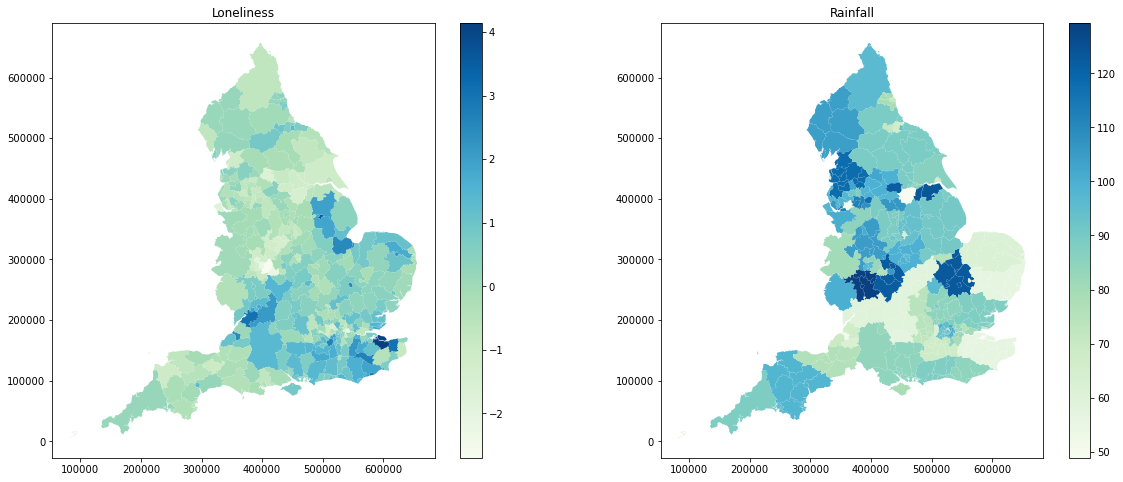

In [30]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
ax1 = map_df.plot(ax=ax1,column='lonely_avg', edgecolor="black",cmap='GnBu',linewidth=0,legend=True)
ax1.set_title('Loneliness')
ax2 = map_df.plot(ax=ax2,column='Average Rainfall (June, mm)', edgecolor="black",linewidth=0,cmap='GnBu',legend=True)
ax2.set_title('Rainfall')

In [24]:
plt.savefig('rainfall.png')

<Figure size 432x288 with 0 Axes>